In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#read in the dataset

nba = pd.read_csv("nba_data.csv")
nba.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [78]:
#Remove unwanted columns and rename some of the columns
nba = nba.drop(['Rk', 'Unnamed: 0'], axis = 1)
nba = nba.rename(columns={"Pos": "Position", "Tm": "Team","G":"Games","GS":"Games_Started","MP":"Minutes"})
nba = nba.rename(columns={"FG": "Field_Goals", "FGA": "FG_Attempts","FT":"Free_Throws"})
nba.head()

,Player,Position,Age,Team,Games,Games_Started,Minutes,Field_Goals,FG_Attempts,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [80]:
#Change variable type to numeric
nba["Minutes"] = pd.to_numeric(nba["Minutes"],errors="coerce")
nba["Field_Goals"] = pd.to_numeric(nba["Field_Goals"],errors="coerce")
nba["FG_Attempts"] = pd.to_numeric(nba["FG_Attempts"],errors="coerce")
nba["FG%"] = pd.to_numeric(nba["FG%"],errors="coerce")
nba["FT%"] = pd.to_numeric(nba["FT%"],errors="coerce")
nba["PTS"] = pd.to_numeric(nba["PTS"],errors="coerce")
nba["AST"] = pd.to_numeric(nba["AST"],errors="coerce")
nba["TOV"] = pd.to_numeric(nba["TOV"],errors="coerce")
nba["BLK"] = pd.to_numeric(nba["BLK"],errors="coerce")
nba["Age"] = pd.to_numeric(nba["Age"],errors="coerce")
nba["Games"] = pd.to_numeric(nba["Games"],errors="coerce")

In [82]:
nba.head()


,Player,Position,Age,Team,Games,Games_Started,Minutes,Field_Goals,FG_Attempts,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22.0,TOR,73.0,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28.0,MEM,76.0,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24.0,MIA,56.0,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21.0,MEM,32.0,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36.0,BRK,47.0,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [84]:
#filter to only include players who play a lot
nba = nba[(nba.Minutes > 15)]
nba.head()

group22 = nba.groupby(['Team']).mean().reset_index()
group22


,Team,Age,Games,Minutes,Field_Goals,FG_Attempts,FG%,FT%,AST,BLK,TOV,PTS
0,ATL,26.500000,67.125000,28.275000,5.137500,10.825000,0.476750,0.793375,2.962500,0.475000,1.312500,14.050000
1,BOS,26.166667,70.000000,30.816667,5.533333,11.483333,0.503667,0.812167,3.366667,0.900000,1.750000,15.100000
2,BRK,29.500000,65.500000,24.116667,4.350000,9.200000,0.459833,0.760333,2.666667,0.450000,1.233333,11.783333
3,CHI,25.750000,67.000000,26.975000,5.087500,10.487500,0.488125,0.803500,2.662500,0.425000,1.362500,13.562500
4,CHO,25.000000,71.000000,27.775000,4.862500,10.425000,0.485125,0.717250,3.250000,0.550000,1.462500,13.162500
5,CLE,24.222222,63.888889,26.911111,4.600000,9.477778,0.486556,0.752778,2.411111,0.522222,1.366667,12.455556
6,DAL,26.571429,71.428571,27.200000,4.428571,9.314286,0.486857,0.753143,2.885714,0.428571,1.428571,12.114286
7,DEN,28.333333,70.888889,25.266667,4.422222,9.088889,0.468444,0.809000,3.155556,0.411111,1.466667,11.922222
8,DET,23.000000,63.750000,25.512500,4.087500,9.475000,0.438000,0.788250,2.600000,0.475000,1.487500,11.087500
9,GSW,27.111111,70.333333,23.355556,4.233333,8.922222,0.491556,0.753333,2.333333,0.400000,1.344444,11.700000


In [44]:
#Drop more unwanted columns
group = group.drop(['Age'], axis = 1)
group = group.drop(['Minutes'], axis = 1)


<AxesSubplot:xlabel='Team'>

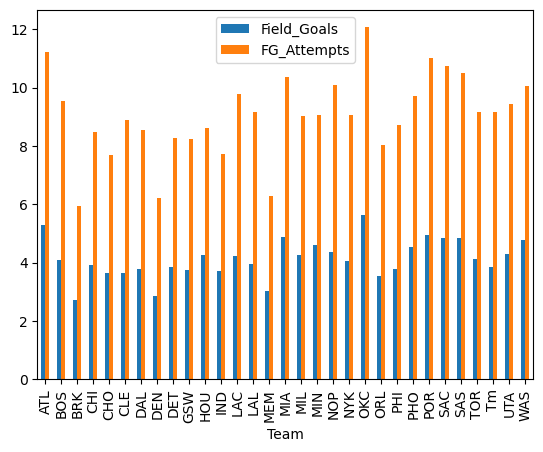

In [103]:
group.plot.bar(x="Team",y=['Field_Goals','FG_Attempts'])